In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# Fetching VIX data using yfinance
start_date = '2020-01-01'
end_date = '2023-05-16'
ticker = '^VIX' # VIX index
vix_data = yf.download(ticker, start=start_date, end=end_date)

# Printing the head of the data
print(vix_data.head())

[*********************100%***********************]  1 of 1 completed
             Open       High    Low  Close  Adj Close  Volume
Date                                                         
2020-01-02  13.46  13.720000  12.42  12.47      12.47       0
2020-01-03  15.01  16.200001  13.13  14.02      14.02       0
2020-01-06  15.45  16.389999  13.54  13.85      13.85       0
2020-01-07  13.84  14.460000  13.39  13.79      13.79       0
2020-01-08  15.16  15.240000  12.83  13.45      13.45       0


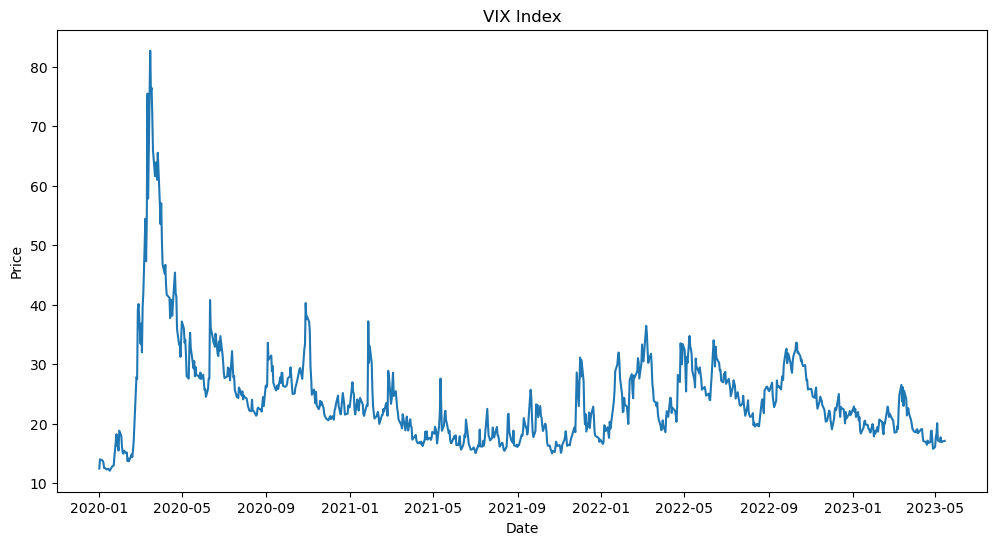

In [3]:
# Plotting the VIX index
plt.figure(figsize=(12, 6))
plt.plot(vix_data['Close'])
plt.title('VIX Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
# Calculating VIX performance metrics
daily_returns = vix_data['Close'].pct_change()
cumulative_returns = (1 + daily_returns).cumprod() - 1
annualized_return = (1 + cumulative_returns[-1]) ** (252 / len(cumulative_returns)) - 1
sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std()

# Printing the performance metrics
print('Annualized Return:', annualized_return)
print('Sharpe Ratio:', sharpe_ratio)

Annualized Return: 0.09875700294661627
Sharpe Ratio: 0.6898602582078515


In [5]:
# Calculating financial ratios
vix_data['SMA20'] = vix_data['Close'].rolling(window=20).mean()
vix_data['SMA50'] = vix_data['Close'].rolling(window=50).mean()
vix_data['returns'] = vix_data['Close'].pct_change()
vix_data['daily_high_low_diff'] = vix_data['High'] - vix_data['Low']
vix_data['daily_open_close_diff'] = vix_data['Open'] - vix_data['Close'].shift(1)
vix_data['daily_returns'] = vix_data['Close'].pct_change()
vix_data['weekly_returns'] = vix_data['Close'].pct_change(periods=5)
vix_data.dropna(inplace=True)

# Printing the head of the data
print(vix_data.head())

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2020-03-13  71.309998  77.570000  55.169998  57.830002  57.830002       0   
2020-03-16  57.830002  83.559998  57.830002  82.690002  82.690002       0   
2020-03-17  82.690002  84.830002  70.370003  75.910004  75.910004       0   
2020-03-18  69.370003  85.470001  69.370003  76.449997  76.449997       0   
2020-03-19  80.620003  84.260002  68.570000  72.000000  72.000000       0   

              SMA20    SMA50   returns  daily_high_low_diff  \
Date                                                          
2020-03-13  35.3995  22.7692 -0.233735            22.400002   
2020-03-16  38.8500  24.1736  0.429881            25.729996   
2020-03-17  41.9040  25.4114 -0.081993            14.459999   
2020-03-18  45.0075  26.6634  0.007114            16.099998   
2020-03-19  47.8295  27.8276 -0.058208            15.690002   

            daily_

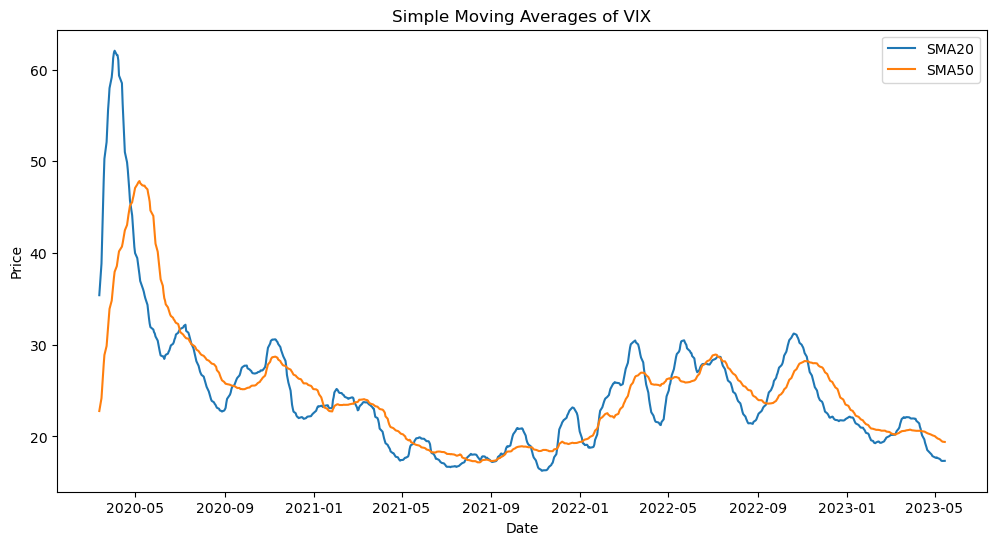

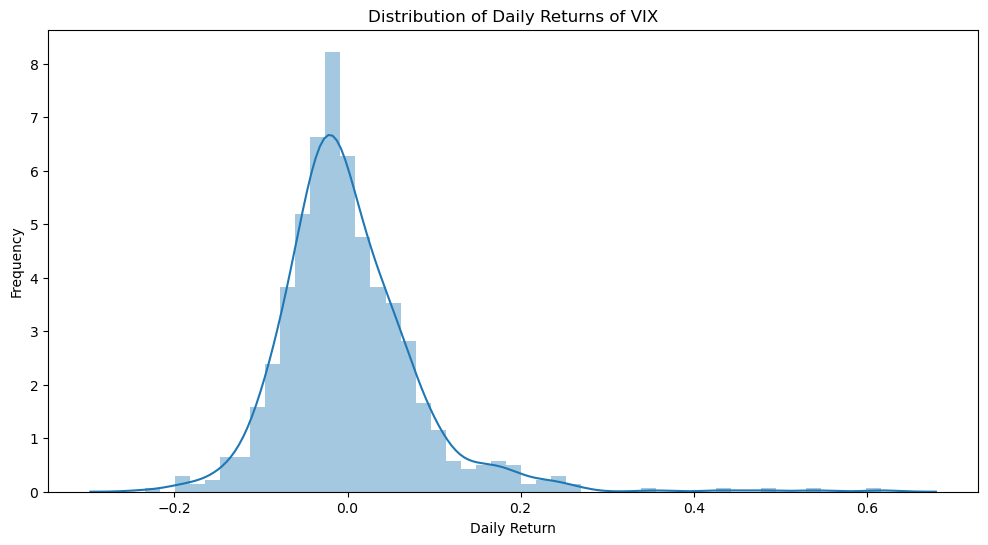

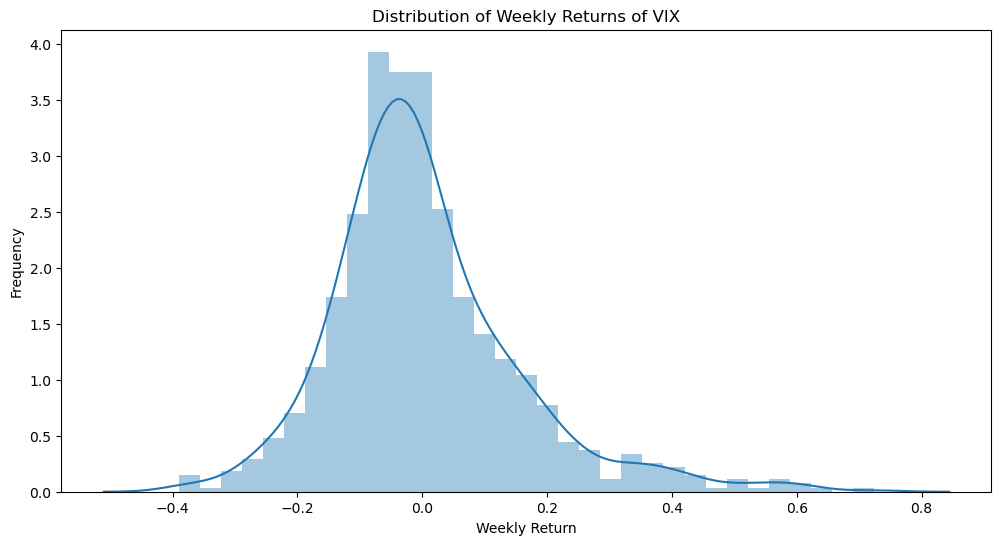

In [6]:
# Plotting financial ratios
plt.figure(figsize=(12, 6))
plt.plot(vix_data['SMA20'], label='SMA20')
plt.plot(vix_data['SMA50'], label='SMA50')
plt.title('Simple Moving Averages of VIX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(vix_data['daily_returns'])
plt.title('Distribution of Daily Returns of VIX')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(vix_data['weekly_returns'])
plt.title('Distribution of Weekly Returns of VIX')
plt.xlabel('Weekly Return')
plt.ylabel('Frequency')
plt.show()

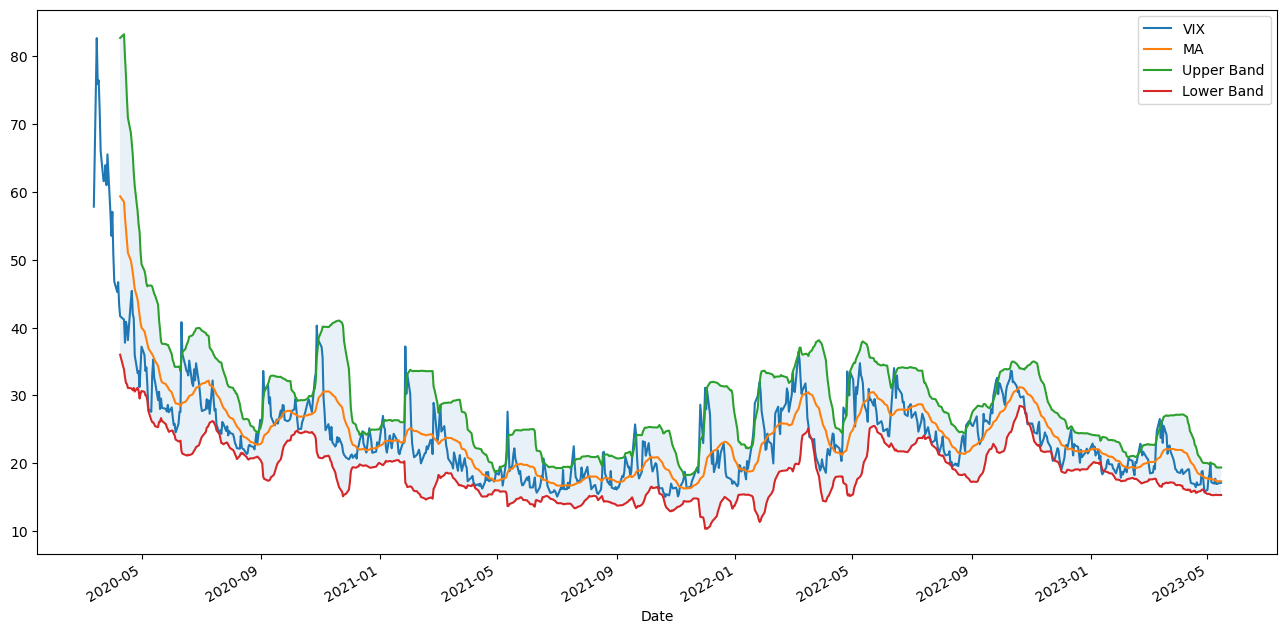

In [7]:
#Calculate moving average and standard deviation
vix_data['MA'] = vix_data['Close'].rolling(window=20).mean()
vix_data['STD'] = vix_data['Close'].rolling(window=20).std()

# Calculate upper and lower bands
vix_data['UpperBand'] = vix_data['MA'] + (vix_data['STD'] * 2)
vix_data['LowerBand'] = vix_data['MA'] - (vix_data['STD'] * 2)

# Calculate the percentage of the close price that is outside the Bollinger Bands
vix_data['PctOutsideBB'] = (vix_data['Close'] - vix_data['LowerBand']) / (vix_data['UpperBand'] - vix_data['LowerBand'])

# Plot the data
fig, ax = plt.subplots(figsize=(16, 8))
vix_data['Close'].plot(ax=ax)
vix_data['MA'].plot(ax=ax)
vix_data['UpperBand'].plot(ax=ax)
vix_data['LowerBand'].plot(ax=ax)
ax.fill_between(vix_data.index, vix_data['UpperBand'], vix_data['LowerBand'], alpha=0.1)
plt.legend(['VIX', 'MA', 'Upper Band', 'Lower Band'])
plt.show()

In [8]:
# Fetching VIX data using yfinance
start_date = '2020-01-01'
end_date = '2023-05-16'
ticker = '^VIX' # VIX index
vix_data2 = yf.download(ticker, start=start_date, end=end_date)

# Printing the head of the data
print(vix_data.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2020-03-13  71.309998  77.570000  55.169998  57.830002  57.830002       0   
2020-03-16  57.830002  83.559998  57.830002  82.690002  82.690002       0   
2020-03-17  82.690002  84.830002  70.370003  75.910004  75.910004       0   
2020-03-18  69.370003  85.470001  69.370003  76.449997  76.449997       0   
2020-03-19  80.620003  84.260002  68.570000  72.000000  72.000000       0   

              SMA20    SMA50   returns  daily_high_low_diff  \
Date                                                          
2020-03-13  35.3995  22.7692 -0.233735            22.400002   
2020-03-16  38.8500  24.1736  0.429881            25.729996   
2020-03-17  41.9040  25.4114 -0.081993            14.459999   
2020-03-18  45.0075  26.6634  0.007114            16.099998   
2020-03-19  4

In [9]:
# Fetching Snp500 data using yfinance
start_date = '2020-01-01'
end_date = '2023-05-16'
ticker = '^SPX' # Snp500 index
SPX_data = yf.download(ticker, start=start_date, end=end_date)

# Printing the head of the data
print(SPX_data.head())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3257.850098   
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3234.850098   
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3246.280029   
2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932  3237.179932   
2020-01-08  3238.590088  3267.070068  3236.669922  3253.050049  3253.050049   

                Volume  
Date                    
2020-01-02  3459930000  
2020-01-03  3484700000  
2020-01-06  3702460000  
2020-01-07  3435910000  
2020-01-08  3726840000  


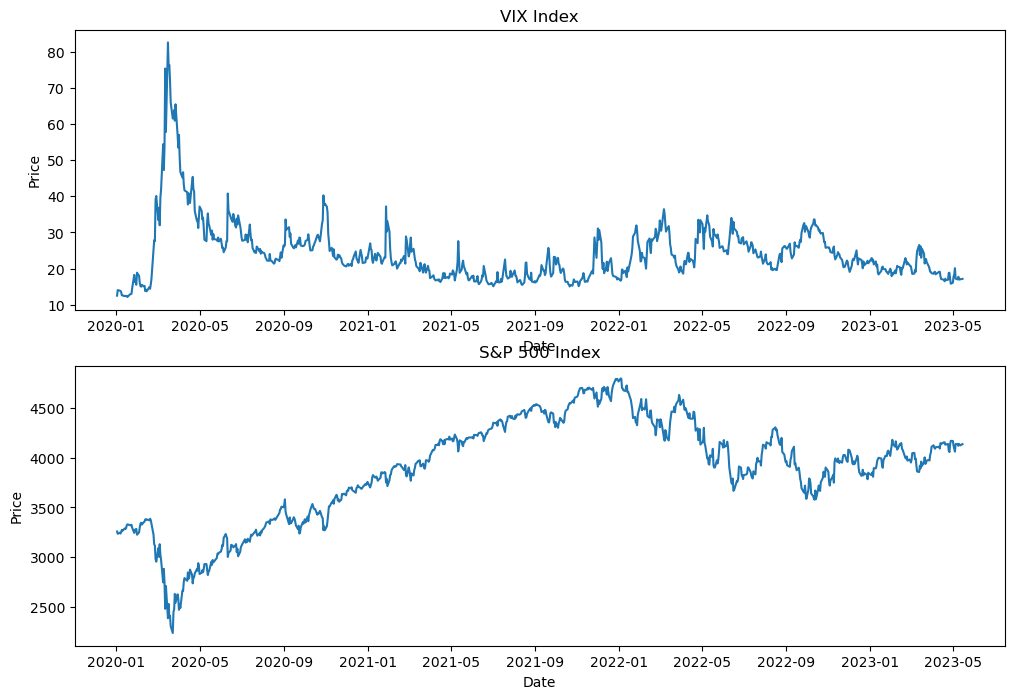

In [10]:
# Plotting the VIX and S&P 500 indexes
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(vix_data2['Close'])
axs[0].set_title('VIX Index')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[1].plot(SPX_data['Close'])
axs[1].set_title('S&P 500 Index')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
plt.show()

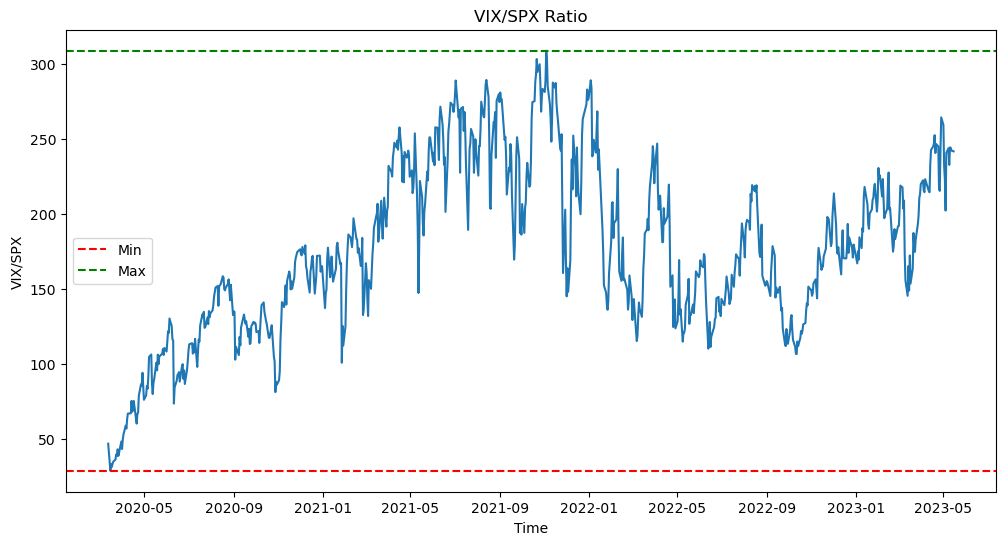

In [11]:

# Assuming you have the VIX and SPX data in CSV files

# Extracting the necessary columns
vix_values = vix_data['Close']
spx_values = SPX_data['Close']

# Calculating the ratio of VIX to SPX
ratio = spx_values / vix_values

# Plotting VIX/SPX
plt.figure(figsize=(12, 6))
plt.plot(ratio)
plt.xlabel('Time')
plt.ylabel('VIX/SPX')
plt.title('VIX/SPX Ratio')

# Adding minimum and maximum lines
min_ratio = np.min(ratio)
max_ratio = np.max(ratio)
plt.axhline(y=min_ratio, color='r', linestyle='--', label='Min')
plt.axhline(y=max_ratio, color='g', linestyle='--', label='Max')

plt.legend()
plt.show()

# Calculation RSI

In [12]:
n = 14 # Number of period
df = pd.DataFrame()
change = ratio.diff(1)
df['Gain'] = change.mask(change<0,0)
df['Loss'] = abs(change.mask(change>0,0))
df['AVG_Gain'] = df.Gain.rolling(n).mean()
df['AVG_Loss'] = df.Loss.rolling(n).mean()
df['RS'] = df['AVG_Gain']/df['AVG_Loss']
df['RSI'] = 100 - (100/(1+df['RS']))

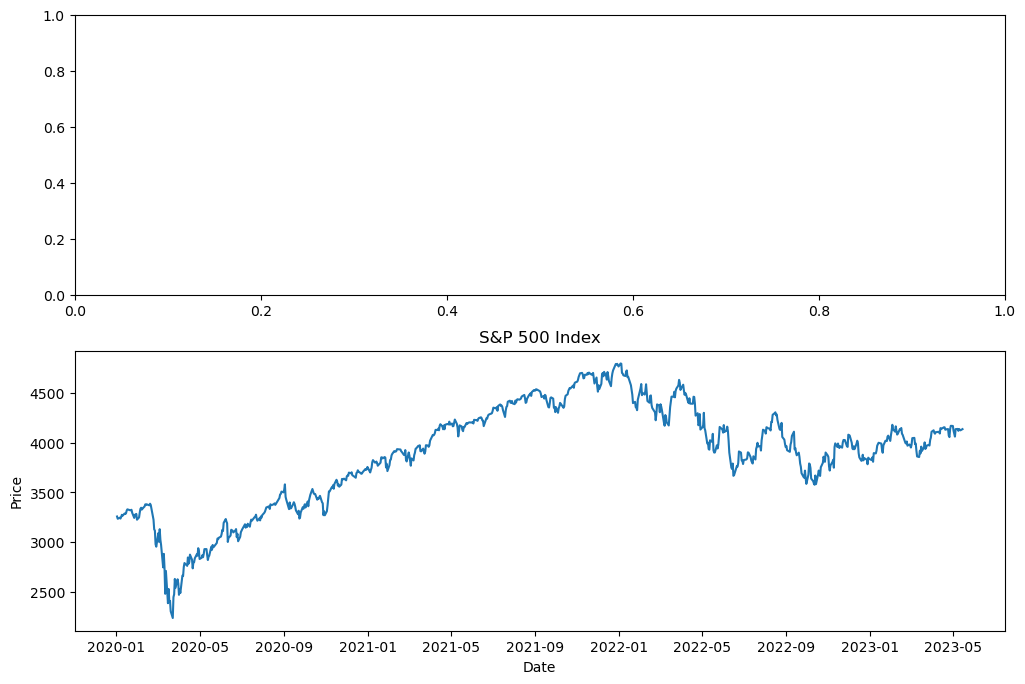

Text(0.5, 0, 'Date')

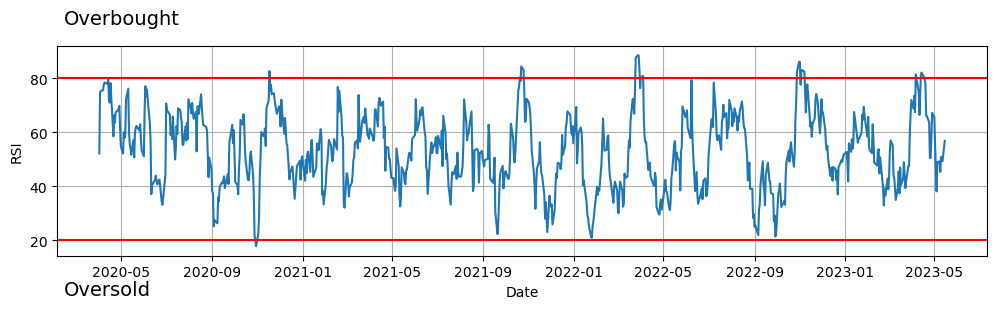

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[1].plot(SPX_data['Close'])
axs[1].set_title('S&P 500 Index')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RSI'], label='Relative Strengths Index')
ax2.text(s='Overbought', x=df.RSI.index[30], y=100, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=0, fontsize=14)
ax2.axhline(y=80, color='red')
ax2.axhline(y=20, color='red')
ax2.grid()
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')

In [17]:
brew install ta-lib

SyntaxError: invalid syntax (3801462010.py, line 1)

In [15]:
import talib as ta
adx = ta.ADX(df['High'], df['Low'],df['Adj Close'], timeperiod=14)
adx = adx.dropna()
adx

ModuleNotFoundError: No module named 'talib'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'symbol' is not defined

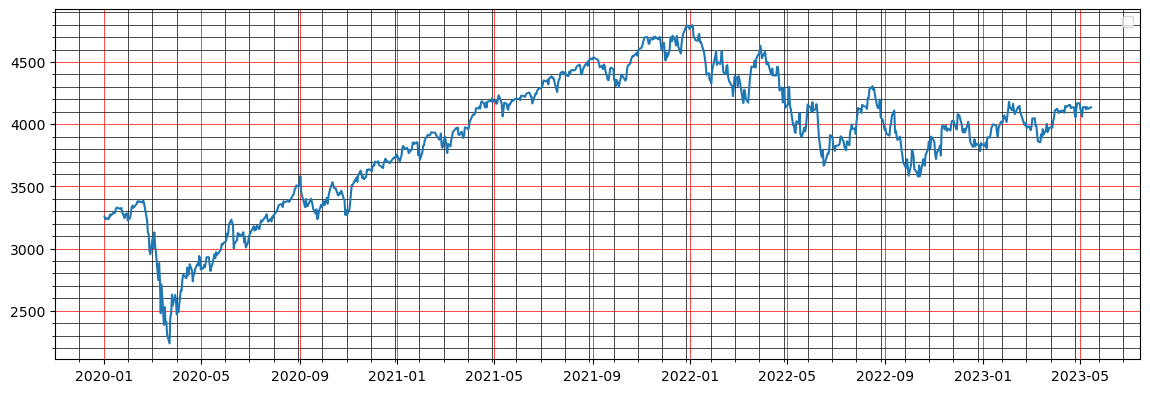

In [14]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(SPX_data['Close'])
#ax1.grid(True, which='both')
ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.minorticks_on()
ax1.legend(loc='best')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(adx, '-', label='ADX')
ax2.text(s='Strong Trend', x=adx.index[0], y=50, fontsize=14)
ax2.text(s='Weak Trend', x=adx.index[0], y=20, fontsize=14)
ax2.axhline(y=50,color='r')
ax2.axhline(y=20,color='r')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

In [22]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip install talib-binary